# PHYS434 HW4

In [1]:
# import the libraries
%matplotlib inline
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist
from matplotlib.pyplot import xticks
import scipy
from scipy import stats

## Problem 0: some fake data to mess with
So let's start by making some fake background data.
First, let's make a time axis that goes from 0 to 100 π  in 1e5 steps

In [2]:
t = np.linspace(0,np.pi*100,np.int(1e5))
print(t)

[0.00000000e+00 3.14162407e-03 6.28324814e-03 ... 3.14152982e+02
 3.14156124e+02 3.14159265e+02]


Then an offset sinusoid

In [3]:
N = 10+np.sin(t)

Then some random background data whose mean and variance depend on N

In [4]:
bkgd = stats.norm.rvs(size=np.int(1e5))*np.sqrt(N)+N

## Problem 1: subsets of data
1a) Make a scatter plot (not a line plot) of the first 1000 data points.

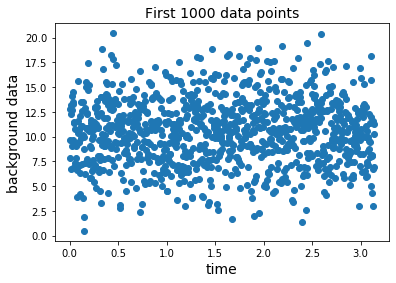

In [5]:
plt.plot(t[0:1000], bkgd[0:1000], "o");
plt.title("First 1000 data points", fontsize = 14);
plt.xlabel("time",fontsize = 14);
plt.ylabel("background data", fontsize = 14);

1b) Generalize your code so you can make a plot of any X contiguous points (e.g. 2000 points starting at point 500), and produce an example plot of a set of data somethere in the middle of your array.

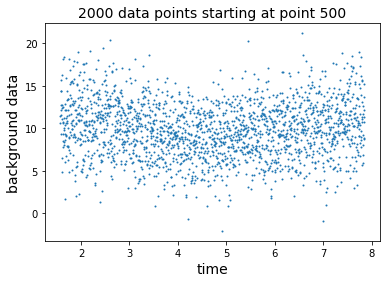

In [6]:
start = 500
numberOfPoints = 2000

# plt.plot(t[start : start+numberOfPoints], bkgd[start : start+numberOfPoints], "o");
plt.scatter(t[start : start+numberOfPoints], bkgd[start : start+numberOfPoints], 1)
plt.title("2000 data points starting at point 500", fontsize = 14);
plt.xlabel("time",fontsize = 14);
plt.ylabel("background data", fontsize = 14);

1c) Sometimes you want to sample the data, such as plotting every 100th point. Make a plot of the full data range, but only every 100th point.

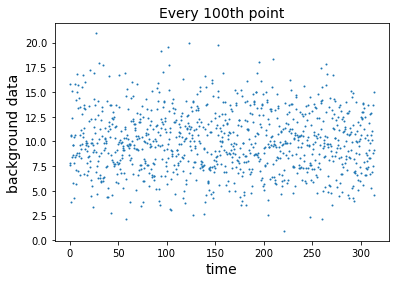

In [7]:
start = 0
end = bkgd.size
step = 100

plt.scatter(t[start : end : step], bkgd[start : end : step], 1);
plt.title("Every 100th point", fontsize = 14);
plt.xlabel("time",fontsize = 14);
plt.ylabel("background data", fontsize = 14);

## Problem 2: density
Now you can make a scatter plot of just a 100,000 points, so you might try it to see what it looks like. But particularly in the central areas the points all overlap into just a blob, and this just gets worse as the number of points goes up. What is better is to plot the density of the points. There are several ways of doing this, but a 2D histogram plot is the easiest (plt.hist2d() in python and histogram2() in MatLab).

2a) Make a 2d histogram plot. Read about options, and play with binsize so it is useful (too large a bin and everything washes out, too small and the sample noise dominates). Make sure you use a colorbar.

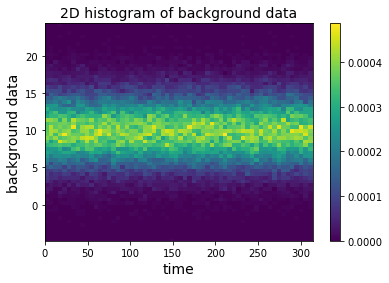

In [8]:
# plot 2d gaussian
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(t,bkgd,bins=60, density=True);
plt.title("2D histogram of background data", fontsize = 14);
plt.ylabel("background data", fontsize = 14);
plt.xlabel("time", fontsize = 14);
plt.colorbar(h[3], ax=ax);

2b) Clearly explain what is being plotted in your plot (e.g. what does each color mean?)

The plot above is a 2D histogram of the background data distribution we created in Problem 1. X axis is time, y axis is background data values, and the color bar represents probability for some combination of x and y values. The higher the probability, the brighter the color. <br>
From the plot, we can see the colors are brighter around y = 10, and colors fade away for lower y or higher y values. This means the probability is higher when y = 10.  <br>
Also, it looks like the distribution doesn't change much with time. 

## Problem 3: folding
Now if you have a periodic signal, it is possible to fold the data stream at that period to make the pattern clearer.

3a) Make an new time variable that folds at a period of  2π  (the modulo operator is your friend, variably expressed as mod(), %, or rem()). Then make a scatter plot of all your data, but now folded. (Reminder, for more data you'd never actually want to plot all the points.)

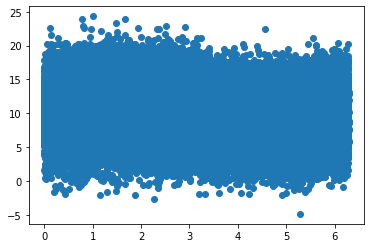

In [9]:
# step = 0.001 * np.pi # it's actually 0.001 pi
# t_fold = np.empty(0)

# for i in range(t.size):
#     mod = t[i] % (2*np.pi)
#     index = round(mod / step)
#     t_fold = np.insert(t_fold, int(index), mod*np.pi)


t_fold = t % (2*np.pi) 

plt.plot(t_fold, bkgd, 'o');

3b) Make a 2D histogram plot of your folded data.

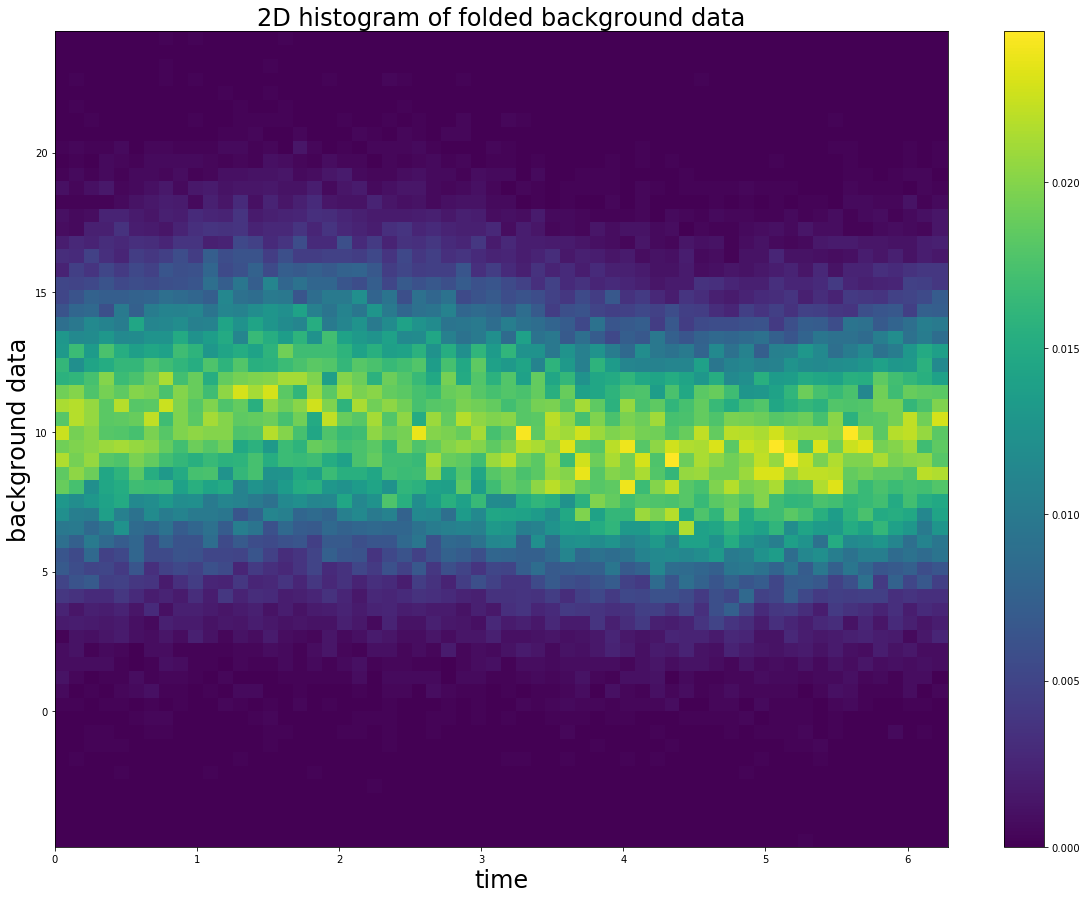

In [10]:
#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)
# plot 2d gaussian
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(t_fold,bkgd,bins=60, density=True);
plt.title("2D histogram of folded background data", fontsize = 24);
plt.ylabel("background data", fontsize = 24);
plt.xlabel("time", fontsize = 24);
plt.colorbar(h[3], ax=ax);

We can see the plot above has a sin shape.

Optional, but very fun and useful:

3c) You can use 2D histograms or digitize functions, plus some math, to calculate the average as a function of the folded variable. You can then overplot this on 3b to show the average as a function of folded time.

In [11]:
binCounts = 60
bins = np.linspace(0, 2*np.pi, binCounts)
tInBin = np.digitize(t_fold, bins) # return which bin each value of time is in
# print(tInBin[1:100])


In [12]:
# find average for each bin

avg = np.empty(0)
for i in range(binCounts): # loop through all bins
    yInBin = np.empty(0) # empty array to store y values in each bin
    for j in range(tInBin.size):
        if i == tInBin[j]:
            yInBin = np.append(yInBin, bkgd[j])  
#         print(str(i) + " " + str(tInBin[j]))
    avg = np.append(avg, np.average(yInBin))

/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


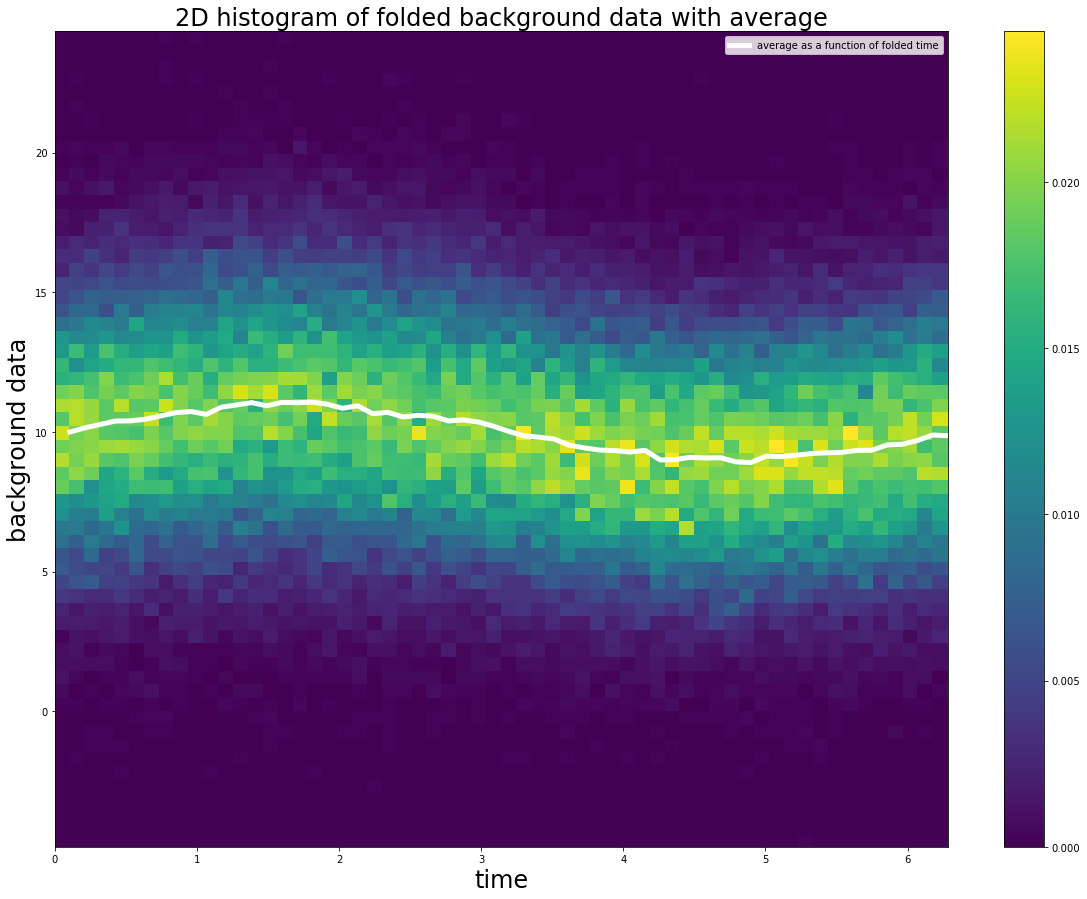

In [13]:
#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)
# plot 2d gaussian
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(t_fold,bkgd,bins=60, density=True);
plt.title("2D histogram of folded background data with average", fontsize = 24);
plt.ylabel("background data", fontsize = 24);
plt.xlabel("time", fontsize = 24);
plt.colorbar(h[3], ax=ax);
plt.plot(bins, avg, 'w', linewidth = 5, label = "average as a function of folded time");
plt.legend();